# virtualization_experiment_5.ipynb

Given the separated streams, this notebook processes each one and adds the results 
into a single stereo stream.

/tmp/ipykernel_31359/3571874610.py:38: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, test_voice = wav.read(f'../Beamforming simulation experiment/Input_voices/voice_1.wav')


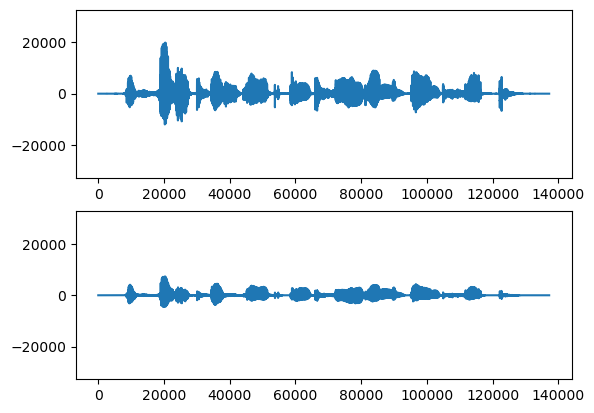

In [1]:
from scipy.io import wavfile as wav
import numpy as np
from matplotlib import pyplot as plt
from class_defs import virtualizer

TARGET_LENGTH = 441344

def pad(voice, target_length=None):
    if target_length:
        pad_length = target_length-voice.shape[0]
    else:
        pad_length = 1024-voice.shape[0]%1024
    
    if pad_length:
        voice = np.pad(voice, (0, pad_length))
    return voice

def process(voice, direction='l'): # assumes voice is a 1d array and already padded
    virt = virtualizer(direction)
    n_blocks = voice.shape[0]//1024

    voice = np.split(voice, n_blocks)
    voice = [virt.virtualize(block) for block in voice]

    final_stereo = np.hstack(voice).T
    final_stereo = np.real(final_stereo)
    return final_stereo

def plot_stereo(stereo_voice):
    plt.subplot(2, 1, 1)
    plt.plot(stereo_voice[:, 0])
    plt.ylim([-32768, 32767])
    plt.subplot(2, 1, 2)
    plt.plot(stereo_voice[:, 1])
    plt.ylim([-32768, 32767])
    plt.show()

fs, test_voice = wav.read(f'../Beamforming simulation experiment/Input_voices/voice_1.wav')
test_voice = np.array(test_voice, dtype=np.float32)[:, 0] # form a numpy array from the first channel

test_voice = pad(test_voice)
final_stereo = process(test_voice, direction='l')
plot_stereo(final_stereo)

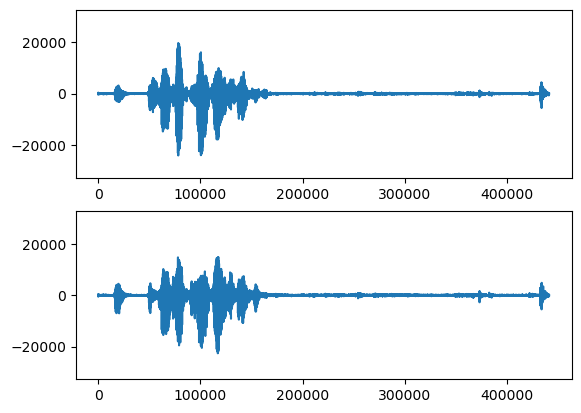

In [2]:
# two speakers at 0 and 180 degrees and level height

fs, spkr_0 = wav.read('raws/raw_2_level_spkr_0.wav')
spkr_0 = pad(spkr_0, TARGET_LENGTH)
spkr_0 = process(spkr_0, direction='l')

fs, spkr_180 = wav.read('raws/raw_2_level_spkr_180.wav')
spkr_180 = pad(spkr_180, TARGET_LENGTH)
spkr_180 = process(spkr_180, direction='r')

final_stereo = spkr_0 + spkr_180
wav.write('final_stereo_5_2_level.wav', fs, final_stereo.astype(np.int16))

plot_stereo(final_stereo)

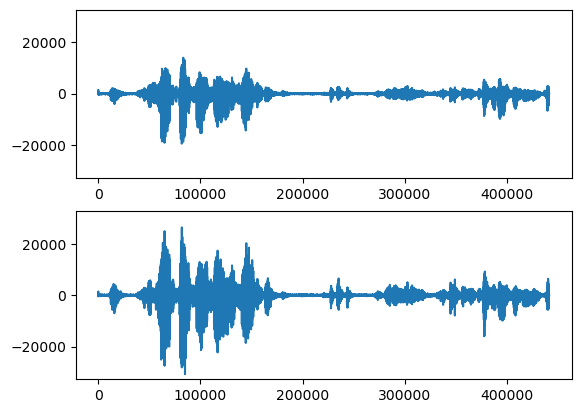

In [3]:
# three speakers at 0, 90, and 180 degrees and level height

fs, spkr_0 = wav.read('raws/raw_3_level_spkr_0.wav')
spkr_0 = pad(spkr_0, TARGET_LENGTH)
spkr_0 = process(spkr_0, direction='l')

fs, spkr_90 = wav.read('raws/raw_3_level_spkr_90.wav')
spkr_90 = pad(spkr_90, TARGET_LENGTH)
spkr_90 = process(spkr_90, direction='c')

fs, spkr_180 = wav.read('raws/raw_3_level_spkr_180.wav')
spkr_180 = pad(spkr_180, TARGET_LENGTH)
spkr_180 = process(spkr_180, direction='r')

final_stereo = spkr_0 + spkr_90 + spkr_180

wav.write('final_stereo_5_3_level.wav', fs, final_stereo.astype(np.int16))

plot_stereo(final_stereo)

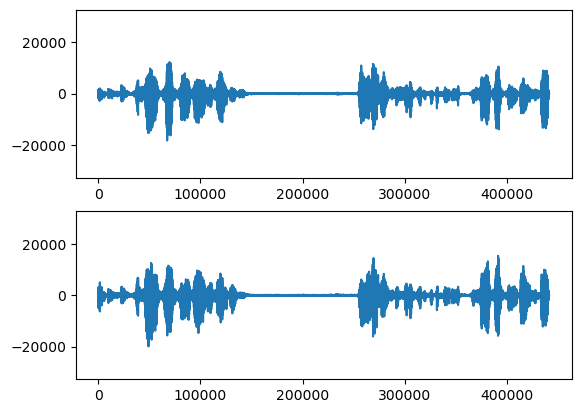

In [4]:
# two speakers at 0 and 180 and elevated height

fs, spkr_0 = wav.read('raws/raw_2_elev_spkr_0.wav')
spkr_0 = pad(spkr_0, TARGET_LENGTH)
spkr_0 = process(spkr_0, direction='l')

fs, spkr_180 = wav.read('raws/raw_2_elev_spkr_180.wav')
spkr_180 = pad(spkr_180, TARGET_LENGTH)
spkr_180 = process(spkr_180, direction='r')

final_stereo = spkr_0 + spkr_180

wav.write('final_stereo_5_2_elevated.wav', fs, final_stereo.astype(np.int16))

plot_stereo(final_stereo)

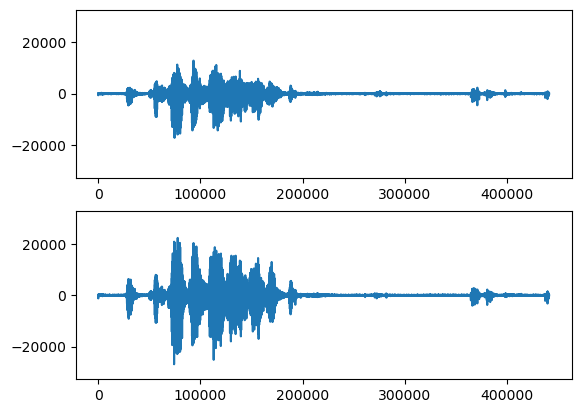

In [5]:
# three speakers at 0, 90, and 180 and elevated height

fs, spkr_0 = wav.read('raws/raw_3_elev_spkr_0.wav')
spkr_0 = pad(spkr_0, TARGET_LENGTH)
spkr_0 = process(spkr_0, direction='l')

fs, spkr_90 = wav.read('raws/raw_3_elev_spkr_90.wav')
spkr_90 = pad(spkr_90, TARGET_LENGTH)
spkr_90 = process(spkr_90, direction='c')

fs, spkr_180 = wav.read('raws/raw_3_elev_spkr_180.wav')
spkr_180 = pad(spkr_180, TARGET_LENGTH)
spkr_180 = process(spkr_180, direction='r')

final_stereo = spkr_0 + spkr_90 + spkr_180

wav.write('final_stereo_5_3_elevated.wav', fs, final_stereo.astype(np.int16))

plot_stereo(final_stereo)